In [97]:
year=2019
month=5

In [98]:
import pandas as pd
import sys
sys.path.append('../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math


In [99]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [114]:
conn=db.get_conn()
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and YEAR(publish_date)={year} and MONTH(publish_date)={month}", con=conn)
conn.close()

In [115]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [116]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['company_title']
del data['company_description']
del data['job_description']
del data['job_id']

In [117]:
def get_summary(data, career):
    
    salaries = data.monthly_salary.values
    headcounts = data.headcount.values
    head_count=np.sum(headcounts)
    salary_average=np.average(salaries, weights=headcounts)
    q = weighted.weighted_quantile(salaries,[0.025,0.5,0.975],headcounts)
    print(f"2019年{month}月全国招收{career}{head_count}人。2019年{month}月全国{career}平均工资{salary_average:.0f}元，工资中位数{q[1]:.0f}元，其中95%的人的工资介于{q[0]:.0f}元到{q[2]:.0f}元。\r\n")
    
get_summary(data, '程序员')

2019年5月全国招收程序员283143人。2019年5月全国程序员平均工资13041元，工资中位数12000元，其中95%的人的工资介于3750元到35000元。



In [118]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

data_format={"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"}



In [119]:
data_career=get_sub_stats_by_col(data,'career')
data_career.style.format(data_format)

,career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
2,系统架构师,21379,5016,20000,45833,9849,3.48%
1,算法工程师,19395,4500,17500,45000,22733,8.03%
3,爬虫工程师,13602,4415,12500,29812,463,0.16%
0,一般程序员,12135,3750,11500,29879,250049,88.31%
4,生物信息工程师,10786,7000,11500,18792,49,0.02%


# 程序员工资

In [120]:
data_city=get_sub_stats_by_col(data,'province')
#data_city.city=data_city.city.map(translate_dict)
data_city.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17533,4500,15000,45000,24239,8.56%
上海,16268,5250,15000,37500,45051,15.91%
广东,14245,4000,12500,35000,71090,25.11%
浙江,13601,3500,12500,35000,17464,6.17%
四川,11754,3000,11500,27500,11342,4.01%
江苏,11617,3750,11000,27083,30927,10.92%
湖北,11042,3750,10000,25000,15583,5.50%
湖南,10811,3750,10000,22583,5912,2.09%
陕西,10786,4000,10000,22500,7307,2.58%
天津,10347,4417,9000,22500,2267,0.80%


In [121]:
def describe(data_city, career):
    
    for index, row in data_city.iterrows():
        print(f"2019年{month}月{row[0]}招收{career}{row[5]}人。2019年{month}月{row[0]}{career}平均工资{row[1]:.0f}元，工资中位数{row[3]:.0f}元，其中95%的人的工资介于{row[2]:.0f}元到{row[4]:.0f}元。\r\n")


In [122]:
describe(data_city,'程序员')

2019年5月北京招收程序员24239人。2019年5月北京程序员平均工资17533元，工资中位数15000元，其中95%的人的工资介于4500元到45000元。

2019年5月上海招收程序员45051人。2019年5月上海程序员平均工资16268元，工资中位数15000元，其中95%的人的工资介于5250元到37500元。

2019年5月广东招收程序员71090人。2019年5月广东程序员平均工资14245元，工资中位数12500元，其中95%的人的工资介于4000元到35000元。

2019年5月浙江招收程序员17464人。2019年5月浙江程序员平均工资13601元，工资中位数12500元，其中95%的人的工资介于3500元到35000元。

2019年5月四川招收程序员11342人。2019年5月四川程序员平均工资11754元，工资中位数11500元，其中95%的人的工资介于3000元到27500元。

2019年5月江苏招收程序员30927人。2019年5月江苏程序员平均工资11617元，工资中位数11000元，其中95%的人的工资介于3750元到27083元。

2019年5月湖北招收程序员15583人。2019年5月湖北程序员平均工资11042元，工资中位数10000元，其中95%的人的工资介于3750元到25000元。

2019年5月湖南招收程序员5912人。2019年5月湖南程序员平均工资10811元，工资中位数10000元，其中95%的人的工资介于3750元到22583元。

2019年5月陕西招收程序员7307人。2019年5月陕西程序员平均工资10786元，工资中位数10000元，其中95%的人的工资介于4000元到22500元。

2019年5月天津招收程序员2267人。2019年5月天津程序员平均工资10347元，工资中位数9000元，其中95%的人的工资介于4417元到22500元。

2019年5月福建招收程序员5524人。2019年5月福建程序员平均工资9930元，工资中位数9500元，其中95%的人的工资介于3000元到20000元。

2019年5月重庆招收程序员4003人。2019年5月重庆程序员平均工资9928元，工资中位数9000元，其中95%的人的工资介于4000元到20000元。

2019年5月贵州招收程序员

In [123]:
data_location = pd.read_csv('../data/provincial_capital_locations.csv', encoding='utf-8')
data_location=data_location.set_index('province')

In [124]:
from mpl_toolkits.basemap import Basemap

In [125]:
def draw_map(data_city,headcount_scale, title):


    #cities = []
    scale = 5

    locations = [(116.407526, 39.90403),(120, 30)]
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams['figure.figsize'] = [13, 13]
    #plt.figure(figsize = (10,5))
    fig, ax = plt.subplots()
    fig.title=title
    fig.figsize=(10,5)
    fig.dpi=80
    cn_map= Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, \
               projection='lcc', lat_1=33, lat_2=45, lon_0=100) # ‘lcc'将投影方式设置为兰伯特投影

    # load the shapefile, use the name 'states'
    cn_map.readshapefile(r'D:/data/basemap/gadm36_CHN_shp/gadm36_CHN_1', name='china', drawbounds=True, color='gray')
    cn_map.readshapefile(r'D:/data/basemap/gadm36_TWN_shp/gadm36_TWN_1', name='taiwan', drawbounds=True, color='gray')
    #geolocator = Nominatim(user_agent="my-application")



    salary_min=data_city.salary_mean.min()
    salary_max=data_city.salary_mean.max()
    salary_middle = (salary_min+salary_max)/2
    salary_scale=salary_max-salary_min

    for index, row in data_city.iterrows():
        province=row[0]
        
        longitude = data_location.loc[province,'longitude']
        latitude = data_location.loc[province,'latitude']
        salary=row[1]
        headcount=row[5]
        #color
        color_red=0
        color_green=0
        color_blue=0
        if salary>salary_middle:
            color_red = 255 #int((salary - salary_middle) / (salary_scale/2)*255)
            color_green = int((salary_max - salary) / (salary_scale/2)*255)
        else:
            color_blue = int((salary_middle - salary) / (salary_scale/2)*255)
            color_green = int((salary - salary_min) / (salary_scale/2)*255)
            color_red = int((salary - salary_min) / (salary_scale/2)*255)

        color = '#{:02x}{:02x}{:02x}'.format(color_red,color_green,color_blue)


        x, y = cn_map(longitude,latitude)
        cn_map.plot(x,y,marker='o',color=color,markersize=int(math.sqrt(headcount/headcount_scale))+8)
        #ax.annotate(city, (x,y), xytext=(5, 5), textcoords='offset points', fontsize=15)
        #"{}{:.0f}".format(city_cn, salary)
        #ax.text(x+5, y+5,city , fontweight='bold', fontsize=int(headcount/2500+12))
        fontsize=int(math.sqrt(headcount/headcount_scale))+13
        if province == '浙江':
            #x=x-400000
            y=y-100000

        elif province=='安徽':
            x=x-300000
            y=y+10000
        elif province=='江苏':
            x=x-150000
        elif province=='天津':
            y=y-50000
        elif province=='上海':
            x=x+50000
        elif province=='湖北':
            y=y-50000

        ax.text(x, y, "{}{:.0f}k".format(province, np.round(salary/1000)), fontweight='bold', fontsize=fontsize, bbox={'facecolor':color, 'alpha':0.3, 'pad':0})
    ax.text(2053805, 1077845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(205805, 107845, "https://github.com/juwikuang/china_job_survey".format(province, np.round(salary/1000)), fontweight='bold',color='#999999', fontsize=20, bbox={'facecolor':'#eeeeee', 'alpha':0.4, 'pad':0})    
    ax.text(805805, 4007845, title.format(province, np.round(salary/1000)), fontweight='bold',color='#111111', fontsize=25)    
    ax.text(805805, 3807845, "（城市大小代表招聘数量，颜色代表工资，红色最高，黄色次之，蓝最少）", fontweight='bold',color='#111111', fontsize=13)    
    #cn_map.drawcoastlines() #绘制海岸线
    #cn_map.drawcountries(linewidth=1.5) #绘制国家边界线
    plt.show()


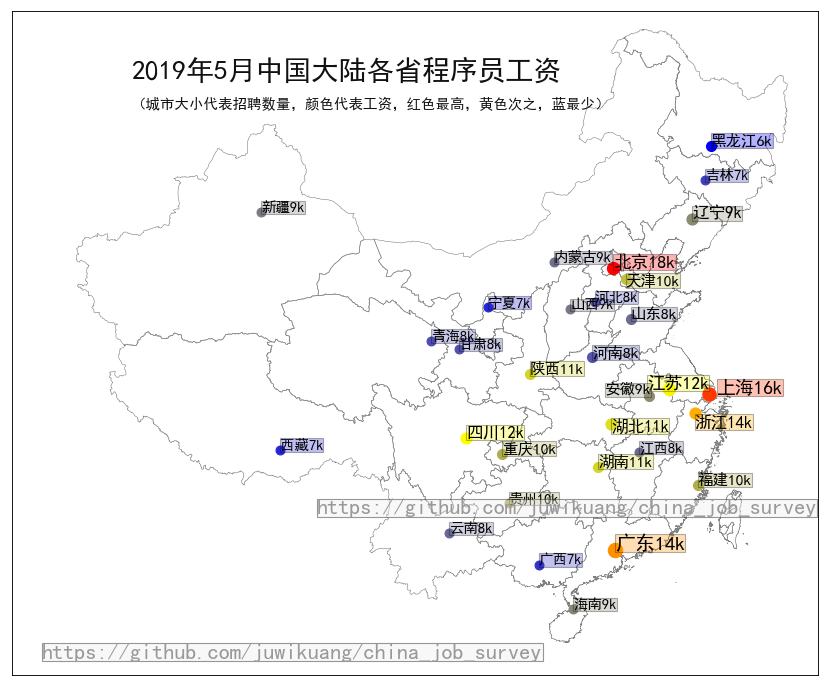

In [126]:
draw_map(data_city,2000,'2019年5月中国大陆各省程序员工资')

# 算法工程师

In [127]:
get_summary(data[data.career=='算法工程师'], '算法工程师')

2019年5月全国招收算法工程师22733人。2019年5月全国算法工程师平均工资19395元，工资中位数17500元，其中95%的人的工资介于4500元到45000元。



In [128]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='算法工程师'],'province')

data_city_algorithm.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,24787,5250,22500,60000,2964,13.04%
上海,23317,6410,22500,45000,4315,18.98%
内蒙古,22500,22500,22500,22500,5,0.02%
广东,20457,5750,18000,45000,5419,23.84%
海南,19479,12500,15000,35000,24,0.11%
浙江,19170,3750,17500,45000,1616,7.11%
江苏,17484,4983,16000,37500,2656,11.68%
四川,16250,5503,15000,30000,987,4.34%
湖北,15424,4000,15000,27500,1210,5.32%
江西,14994,6581,12750,37500,53,0.23%


In [129]:
describe(data_city_algorithm,'算法工程师')

2019年5月北京招收算法工程师2964人。2019年5月北京算法工程师平均工资24787元，工资中位数22500元，其中95%的人的工资介于5250元到60000元。

2019年5月上海招收算法工程师4315人。2019年5月上海算法工程师平均工资23317元，工资中位数22500元，其中95%的人的工资介于6410元到45000元。

2019年5月内蒙古招收算法工程师5人。2019年5月内蒙古算法工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2019年5月广东招收算法工程师5419人。2019年5月广东算法工程师平均工资20457元，工资中位数18000元，其中95%的人的工资介于5750元到45000元。

2019年5月海南招收算法工程师24人。2019年5月海南算法工程师平均工资19479元，工资中位数15000元，其中95%的人的工资介于12500元到35000元。

2019年5月浙江招收算法工程师1616人。2019年5月浙江算法工程师平均工资19170元，工资中位数17500元，其中95%的人的工资介于3750元到45000元。

2019年5月江苏招收算法工程师2656人。2019年5月江苏算法工程师平均工资17484元，工资中位数16000元，其中95%的人的工资介于4983元到37500元。

2019年5月四川招收算法工程师987人。2019年5月四川算法工程师平均工资16250元，工资中位数15000元，其中95%的人的工资介于5503元到30000元。

2019年5月湖北招收算法工程师1210人。2019年5月湖北算法工程师平均工资15424元，工资中位数15000元，其中95%的人的工资介于4000元到27500元。

2019年5月江西招收算法工程师53人。2019年5月江西算法工程师平均工资14994元，工资中位数12750元，其中95%的人的工资介于6581元到37500元。

2019年5月青海招收算法工程师1人。2019年5月青海算法工程师平均工资14583元，工资中位数14583元，其中95%的人的工资介于14583元到14583元。

2019年5月陕西招收算法工程师614人。2019年5月陕西算法工程师平均工资14318元，工资中位数12916元，其中

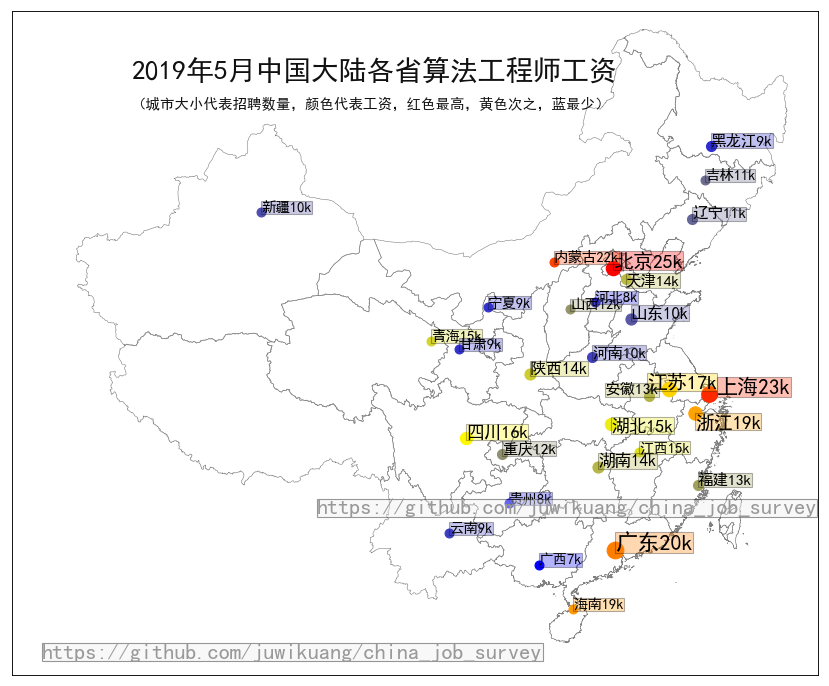

In [131]:
draw_map(data_city_algorithm,100,f'2019年{month}月中国大陆各省算法工程师工资')

# 系统架构师

In [132]:
get_summary(data[data.career=='系统架构师'], '系统架构师')

2019年5月全国招收系统架构师9849人。2019年5月全国系统架构师平均工资21379元，工资中位数20000元，其中95%的人的工资介于5016元到45833元。



In [133]:
data_city_architect=get_sub_stats_by_col(data[data.career=='系统架构师'],'province')

data_city_architect.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,29709,4500,27500,60000,1280,13.00%
上海,25954,7000,25000,50000,1841,18.69%
广东,21621,5250,20000,47125,2850,28.94%
浙江,21049,5250,22500,40000,620,6.30%
天津,19358,5906,17500,48750,65,0.66%
四川,18820,4969,17500,42500,325,3.30%
河北,18641,7000,14000,35000,46,0.47%
江苏,17824,5386,17500,35000,847,8.60%
湖北,16253,5028,15611,30646,429,4.36%
陕西,15992,5400,16200,29167,180,1.83%


In [134]:
describe(data_city_architect,'系统架构师')

2019年5月北京招收系统架构师1280人。2019年5月北京系统架构师平均工资29709元，工资中位数27500元，其中95%的人的工资介于4500元到60000元。

2019年5月上海招收系统架构师1841人。2019年5月上海系统架构师平均工资25954元，工资中位数25000元，其中95%的人的工资介于7000元到50000元。

2019年5月广东招收系统架构师2850人。2019年5月广东系统架构师平均工资21621元，工资中位数20000元，其中95%的人的工资介于5250元到47125元。

2019年5月浙江招收系统架构师620人。2019年5月浙江系统架构师平均工资21049元，工资中位数22500元，其中95%的人的工资介于5250元到40000元。

2019年5月天津招收系统架构师65人。2019年5月天津系统架构师平均工资19358元，工资中位数17500元，其中95%的人的工资介于5906元到48750元。

2019年5月四川招收系统架构师325人。2019年5月四川系统架构师平均工资18820元，工资中位数17500元，其中95%的人的工资介于4969元到42500元。

2019年5月河北招收系统架构师46人。2019年5月河北系统架构师平均工资18641元，工资中位数14000元，其中95%的人的工资介于7000元到35000元。

2019年5月江苏招收系统架构师847人。2019年5月江苏系统架构师平均工资17824元，工资中位数17500元，其中95%的人的工资介于5386元到35000元。

2019年5月湖北招收系统架构师429人。2019年5月湖北系统架构师平均工资16253元，工资中位数15611元，其中95%的人的工资介于5028元到30646元。

2019年5月陕西招收系统架构师180人。2019年5月陕西系统架构师平均工资15992元，工资中位数16200元，其中95%的人的工资介于5400元到29167元。

2019年5月重庆招收系统架构师124人。2019年5月重庆系统架构师平均工资15278元，工资中位数15000元，其中95%的人的工资介于7000元到23500元。

2019年5月江西招收系统架构师51人。2019年5月江西系统架构师平均工资15235元，工资中位数12500元，其中95%的人

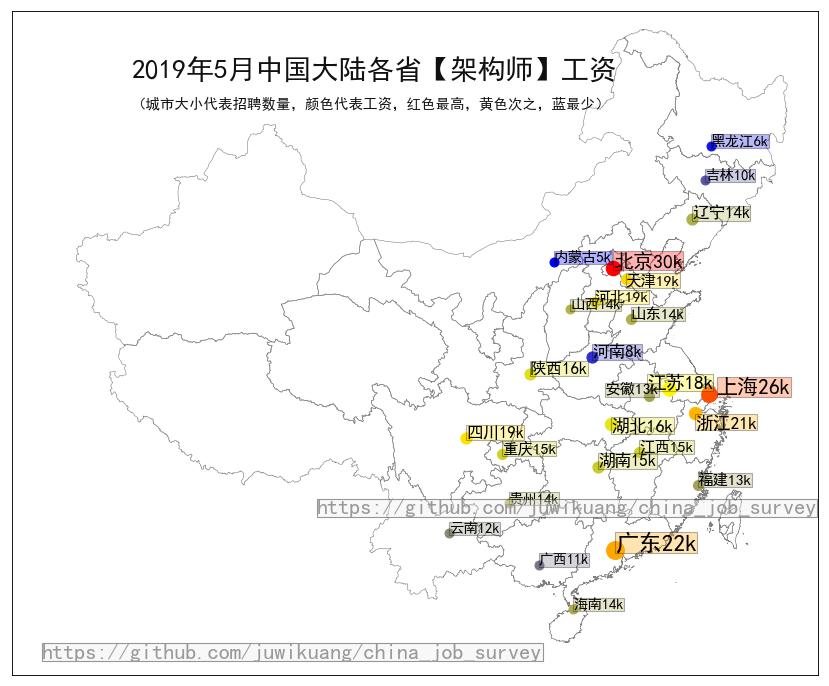

In [135]:
draw_map(data_city_architect,40,f'2019年{month}月中国大陆各省【架构师】工资')

# 生物信息工程师

In [136]:
get_summary(data[data.career=='生物信息工程师'], '生物信息工程师')

2019年5月全国招收生物信息工程师49人。2019年5月全国生物信息工程师平均工资10786元，工资中位数11500元，其中95%的人的工资介于7000元到18792元。



In [137]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息工程师'],'province')
#data_bio.city=data_bio.city.map(translate_dict)
data_bio.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
浙江,12500,12500,12500,12500,1,2.04%
江苏,11900,9000,10750,20000,5,10.20%
广东,11833,7000,11500,15000,18,36.73%
吉林,11500,11500,11500,11500,2,4.08%
上海,11292,7000,12500,17500,12,24.49%
湖北,8143,8000,8143,9000,7,14.29%
江西,7000,7000,7000,7000,1,2.04%
广西,7000,7000,7000,7000,3,6.12%


In [138]:
describe(data_bio,'生物信息工程师')

2019年5月浙江招收生物信息工程师1人。2019年5月浙江生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2019年5月江苏招收生物信息工程师5人。2019年5月江苏生物信息工程师平均工资11900元，工资中位数10750元，其中95%的人的工资介于9000元到20000元。

2019年5月广东招收生物信息工程师18人。2019年5月广东生物信息工程师平均工资11833元，工资中位数11500元，其中95%的人的工资介于7000元到15000元。

2019年5月吉林招收生物信息工程师2人。2019年5月吉林生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2019年5月上海招收生物信息工程师12人。2019年5月上海生物信息工程师平均工资11292元，工资中位数12500元，其中95%的人的工资介于7000元到17500元。

2019年5月湖北招收生物信息工程师7人。2019年5月湖北生物信息工程师平均工资8143元，工资中位数8143元，其中95%的人的工资介于8000元到9000元。

2019年5月江西招收生物信息工程师1人。2019年5月江西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。

2019年5月广西招收生物信息工程师3人。2019年5月广西生物信息工程师平均工资7000元，工资中位数7000元，其中95%的人的工资介于7000元到7000元。



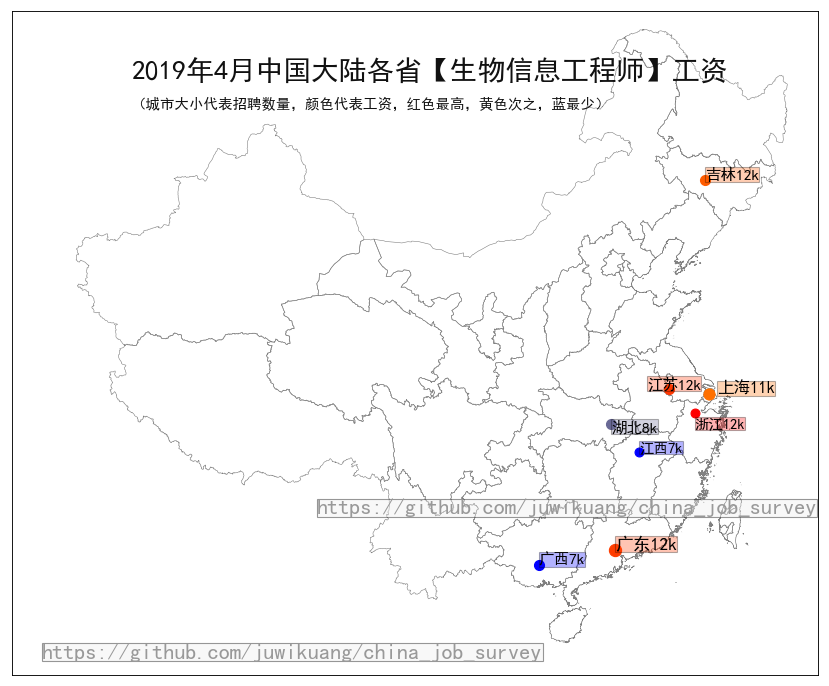

In [139]:
draw_map(data_bio,2,'2019年4月中国大陆各省【生物信息工程师】工资')

# 爬虫工程师

In [140]:
get_summary(data[data.career=='爬虫工程师'], '爬虫工程师')

2019年5月全国招收爬虫工程师463人。2019年5月全国爬虫工程师平均工资13602元，工资中位数12500元，其中95%的人的工资介于4415元到29812元。



In [141]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫工程师'],'province')


data_spider=data_spider[data_spider.head_count>10]
data_spider.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,17615,1750,17375,44583,29,6.26%
上海,15469,3839,14821,30833,90,19.44%
江苏,14978,9000,12500,22425,23,4.97%
广东,14405,5250,12500,28646,185,39.96%
山东,14136,9000,11786,27500,11,2.38%
浙江,13100,9000,11929,22500,20,4.32%
四川,10812,5250,11500,17500,28,6.05%
湖北,10219,7000,11500,12500,16,3.46%
湖南,9371,5447,8846,17050,29,6.26%
河南,5838,5000,5250,9000,17,3.67%


In [142]:
describe(data_spider, '爬虫工程师')

2019年5月北京招收爬虫工程师29人。2019年5月北京爬虫工程师平均工资17615元，工资中位数17375元，其中95%的人的工资介于1750元到44583元。

2019年5月上海招收爬虫工程师90人。2019年5月上海爬虫工程师平均工资15469元，工资中位数14821元，其中95%的人的工资介于3839元到30833元。

2019年5月江苏招收爬虫工程师23人。2019年5月江苏爬虫工程师平均工资14978元，工资中位数12500元，其中95%的人的工资介于9000元到22425元。

2019年5月广东招收爬虫工程师185人。2019年5月广东爬虫工程师平均工资14405元，工资中位数12500元，其中95%的人的工资介于5250元到28646元。

2019年5月山东招收爬虫工程师11人。2019年5月山东爬虫工程师平均工资14136元，工资中位数11786元，其中95%的人的工资介于9000元到27500元。

2019年5月浙江招收爬虫工程师20人。2019年5月浙江爬虫工程师平均工资13100元，工资中位数11929元，其中95%的人的工资介于9000元到22500元。

2019年5月四川招收爬虫工程师28人。2019年5月四川爬虫工程师平均工资10812元，工资中位数11500元，其中95%的人的工资介于5250元到17500元。

2019年5月湖北招收爬虫工程师16人。2019年5月湖北爬虫工程师平均工资10219元，工资中位数11500元，其中95%的人的工资介于7000元到12500元。

2019年5月湖南招收爬虫工程师29人。2019年5月湖南爬虫工程师平均工资9371元，工资中位数8846元，其中95%的人的工资介于5447元到17050元。

2019年5月河南招收爬虫工程师17人。2019年5月河南爬虫工程师平均工资5838元，工资中位数5250元，其中95%的人的工资介于5000元到9000元。



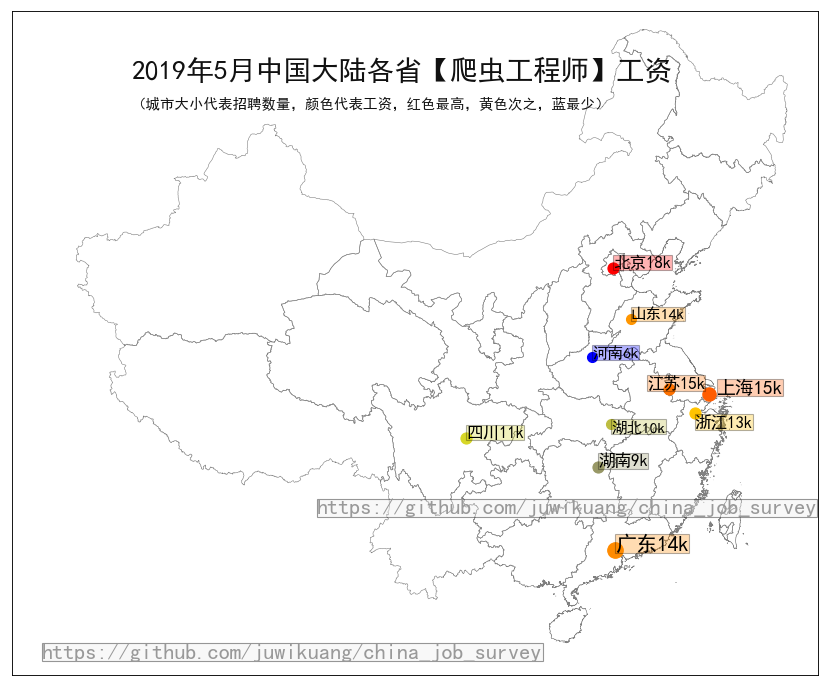

In [144]:
draw_map(data_spider,5,f'2019年{month}月中国大陆各省【爬虫工程师】工资')

# Java程序员

In [146]:
get_summary(data[data.pl_java==1], 'Java程序员')

2019年5月全国招收Java程序员128804人。2019年5月全国Java程序员平均工资13066元，工资中位数12500元，其中95%的人的工资介于3750元到30000元。



In [147]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'province')
data_java.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
上海,16662,5250,15000,35416,19771,15.35%
北京,16446,5000,14000,37958,11745,9.12%
广东,14420,4000,12500,33333,31248,24.26%
浙江,14075,3500,12500,35000,8126,6.31%
四川,11592,2500,11000,25000,4827,3.75%
江苏,11467,3750,11000,25000,14541,11.29%
贵州,11270,4557,10500,15908,532,0.41%
湖北,10959,4500,10000,25000,6169,4.79%
陕西,10893,3750,10499,22500,3358,2.61%
天津,10612,4130,9333,27262,1157,0.90%


In [148]:
describe(data_java, 'Java程序员')

2019年5月上海招收Java程序员19771人。2019年5月上海Java程序员平均工资16662元，工资中位数15000元，其中95%的人的工资介于5250元到35416元。

2019年5月北京招收Java程序员11745人。2019年5月北京Java程序员平均工资16446元，工资中位数14000元，其中95%的人的工资介于5000元到37958元。

2019年5月广东招收Java程序员31248人。2019年5月广东Java程序员平均工资14420元，工资中位数12500元，其中95%的人的工资介于4000元到33333元。

2019年5月浙江招收Java程序员8126人。2019年5月浙江Java程序员平均工资14075元，工资中位数12500元，其中95%的人的工资介于3500元到35000元。

2019年5月四川招收Java程序员4827人。2019年5月四川Java程序员平均工资11592元，工资中位数11000元，其中95%的人的工资介于2500元到25000元。

2019年5月江苏招收Java程序员14541人。2019年5月江苏Java程序员平均工资11467元，工资中位数11000元，其中95%的人的工资介于3750元到25000元。

2019年5月贵州招收Java程序员532人。2019年5月贵州Java程序员平均工资11270元，工资中位数10500元，其中95%的人的工资介于4557元到15908元。

2019年5月湖北招收Java程序员6169人。2019年5月湖北Java程序员平均工资10959元，工资中位数10000元，其中95%的人的工资介于4500元到25000元。

2019年5月陕西招收Java程序员3358人。2019年5月陕西Java程序员平均工资10893元，工资中位数10499元，其中95%的人的工资介于3750元到22500元。

2019年5月天津招收Java程序员1157人。2019年5月天津Java程序员平均工资10612元，工资中位数9333元，其中95%的人的工资介于4130元到27262元。

2019年5月湖南招收Java程序员2924人。2019年5月湖南Java程序员平均工资10326元，工资中位数10000元，其中95%的人的工资介于3750元到20000元。

2019年5月重

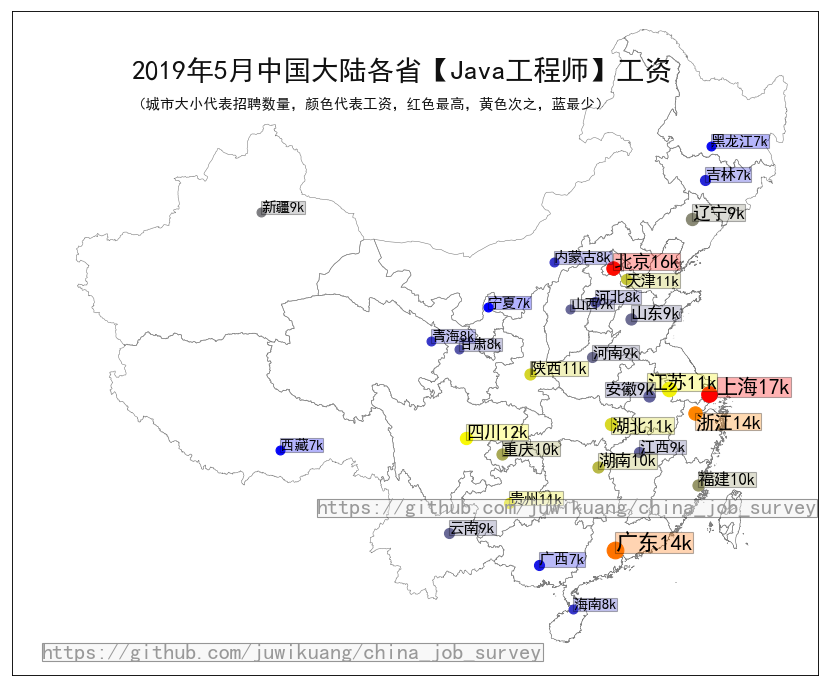

In [149]:
draw_map(data_java, 500, f'2019年{month}月中国大陆各省【Java工程师】工资')

# Python程序员

In [150]:
get_summary(data[data.pl_python==1], 'Python程序员')

2019年5月全国招收Python程序员27930人。2019年5月全国Python程序员平均工资17810元，工资中位数15000元，其中95%的人的工资介于3750元到43958元。



In [151]:
data_python=get_sub_stats_by_col(data[(data.pl_python==1)],'province')
data_python.style.hide_index().format(data_format)

province,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
北京,22333,3750,20000,55000,4004,14.34%
上海,21226,5250,20000,45000,5799,20.76%
广东,18808,4500,16500,45000,6576,23.54%
海南,17958,5500,15000,35000,24,0.09%
浙江,16844,3100,15000,45000,1684,6.03%
四川,15502,4780,14000,35000,1232,4.41%
江苏,15298,3430,14071,30583,2884,10.33%
湖北,14465,3750,13000,32715,1349,4.83%
陕西,12647,2730,12500,27861,650,2.33%
天津,12570,4146,11167,22500,159,0.57%


In [152]:
describe(data_python, 'Python程序员')

2019年5月北京招收Python程序员4004人。2019年5月北京Python程序员平均工资22333元，工资中位数20000元，其中95%的人的工资介于3750元到55000元。

2019年5月上海招收Python程序员5799人。2019年5月上海Python程序员平均工资21226元，工资中位数20000元，其中95%的人的工资介于5250元到45000元。

2019年5月广东招收Python程序员6576人。2019年5月广东Python程序员平均工资18808元，工资中位数16500元，其中95%的人的工资介于4500元到45000元。

2019年5月海南招收Python程序员24人。2019年5月海南Python程序员平均工资17958元，工资中位数15000元，其中95%的人的工资介于5500元到35000元。

2019年5月浙江招收Python程序员1684人。2019年5月浙江Python程序员平均工资16844元，工资中位数15000元，其中95%的人的工资介于3100元到45000元。

2019年5月四川招收Python程序员1232人。2019年5月四川Python程序员平均工资15502元，工资中位数14000元，其中95%的人的工资介于4780元到35000元。

2019年5月江苏招收Python程序员2884人。2019年5月江苏Python程序员平均工资15298元，工资中位数14071元，其中95%的人的工资介于3430元到30583元。

2019年5月湖北招收Python程序员1349人。2019年5月湖北Python程序员平均工资14465元，工资中位数13000元，其中95%的人的工资介于3750元到32715元。

2019年5月陕西招收Python程序员650人。2019年5月陕西Python程序员平均工资12647元，工资中位数12500元，其中95%的人的工资介于2730元到27861元。

2019年5月天津招收Python程序员159人。2019年5月天津Python程序员平均工资12570元，工资中位数11167元，其中95%的人的工资介于4146元到22500元。

2019年5月江西招收Python程序员82人。2019年5月江西Python程序员平均工资12211元，工资中位数9250元，

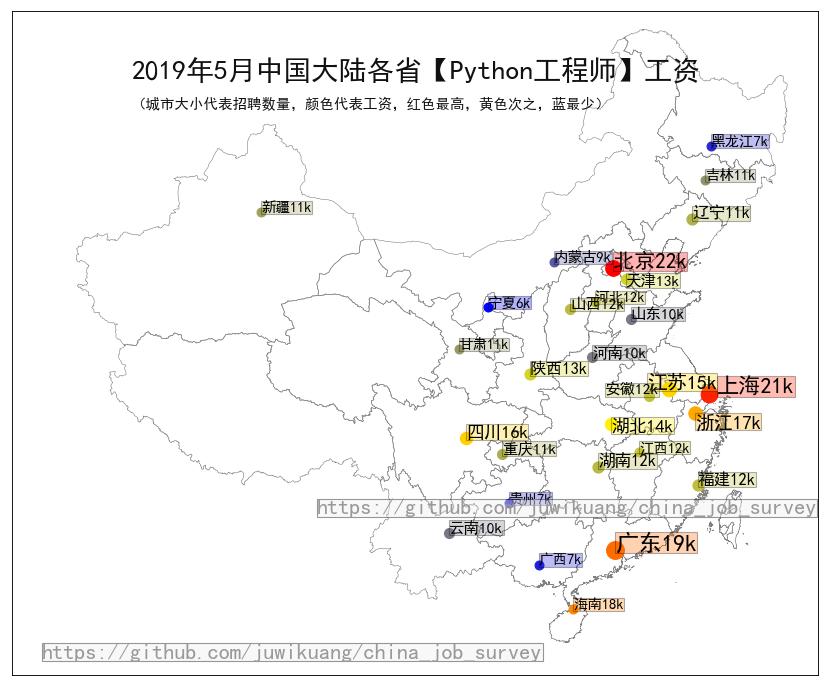

In [153]:
draw_map(data_python, 100,  f'2019年{month}月中国大陆各省【Python工程师】工资')